# Wednesday: Tree Based Methods

These methods are based on stratifying / segmenting the predictor space, and summarizing them in to decission trees. 

**Decission trees**


* simpler better for inference
* less competitive for prediction, however if used in collective i.e. many trees they are very robust.

terminology:

* terminal nodes: nodes that don't split any further.
* internal nodes: nodes that do split further.


Example decission that has stratified years in the league and hits, the numbers are the log salaries. An inference can be made that number of hits is an important predictor only if the player has been in the league for more than 4.5 years. The length of the arms of the tree correspond to the reduction in RSS.
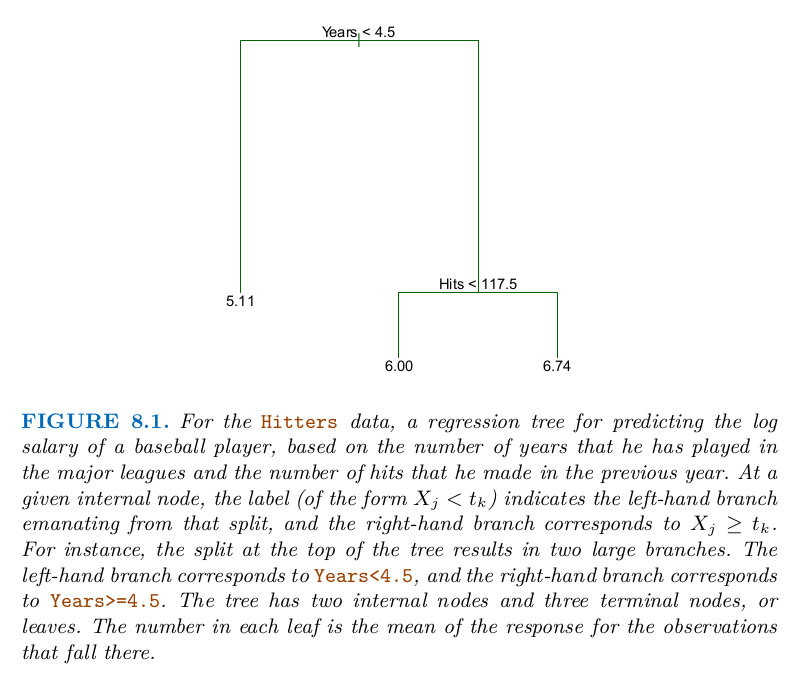


**Tree building**

Divide the predictor space into $J$ non-overlapping regions $R_1,2...j$ (image above j =3), for every region we make the same prediction i.e. the mean of the of the response values for the training observations. 

&rarr; we want the regions / boxes to be small, the smaller the box the more homogenous the response values that estimate the mean and thus the more precise the prediction.

The following formula defines the problem: $\hat{y}$ is the mean of the box $y_i$ the individual observation, so were looking at the residual sum of squares. Thus we need to minimize the sum of RSS. 
$$\Large \sum_{j=1}^{J}\sum_{i\in R_{j}}\left(y_{i}-\hat{y}_{R_{j}}\right)^{2}$$

This problem is too difficult to compute for more than 10 boxes as the total number of configuration becomes very large.

&rarr; use a top down greedy approach: sequentially split the predictor space so that RSS is minimized within each region. This will not find the most optimal tree but tries to aproximate it.


**Pruning (Snoeien) the tree**

* To minimize RSS one could aim to build the largest tree where each box has only one observation, however this leads to overfitting.
* Or stop the tree build earlier when no decrease in RSS is met, but this leads to missing splits that decrease RSS beyond the stop point.

therefor the best option would be to produce a full tree with a minimum of 5 observations per box, and prune it to a smaller subtree. This is called **weakest link pruning**.

Similar to lasso and ridge regression we use a penalty the more nodes are in the tree. Here $|T|$ is the total number of terminal nodes, and the $\alpha$ term is similar to the tuning parameter which penalizes based on $|T|$. So for each value of $\alpha$ there exists a subtree ($T \subset T_0$) that minimizes the following formula.
$$\Large \sum_{m=1}^{\left[T\right]}\sum_{i:\;x_{i}\in R_{m}}^{}\left(y_{i}-\hat{y}_{R_{m}}\right)^{2}+\alpha|T|$$

The best value for $\alpha$ is found by using cross-validation (k-fold), pick $\alpha$ so that the test error is smallest.  

**Classification**

We predict the class of the majority in the region. So the we need to minimize the number of observations that do not belong to the majority class. Here $\hat{p}_mk$ denotes the proportion of observations that are in the mth region and from the kth class: 
$$\Large E=1-\operatorname*{max}_{k}(\hat{p}_{m\,k}).$$

However this method is not sensitive enough and there for the gini index is used: 
$$\Large G=\sum_{k=1}^{K}\hat{p}_{m k}(1-\hat{p}_{m k})$$

So G is small when one class is dominant and zero if the region is homogenous. It thus measures the purity of a tree. 

Pros: 
* trees easy to understand for the lay folk.

cons:
* trees are perform worse compared to other decission methods.

**Regression tree build overview**

1. Use recursive binary splitting to grow a large tree on the training
data, stopping only when each terminal node has fewer than some
minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a
sequence of best subtrees, as a function of α.
3. Use K-fold cross-validation to choose α. That is, divide the training
observations into K folds. For each k = 1, . . . , K:
(a) Repeat Steps 1 and 2 on all but the kth fold of the training data.
(b) Evaluate the mean squared prediction error on the data in the
left-out kth fold, as a function of α.
Average the results for each value of α, and pick α to minimize the
average error.
4. Return the subtree from Step 2 that corresponds to the chosen value
of α.


**Bagging**

We take B bootstrap samples from the dataset and build a tree from it, pruning not necessary. We denote the tree that was build on the bth data set $\large \hat{f}^*b(x)$. We then retrieve the average prediction by using the formula below. 
$$\Large \hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^B \hat{f}^*b(x)$$

With classificatinon we can use majority vote among the trees. These methods reduce the bias as we aren't pruning while also reducing variance. 

Out of bag error: we split the bootstrap in a training and test (Out Of Bag) we can then calculate the OOB-error rate. 

**Random Forest**

Uses a collection of trees on bootstrap samples, but additionally subsets the predictors as well typically takes $\large m \approx \sqrt{p}$. The trees that are buildt are thus different, this slightly decorelates the trees. 

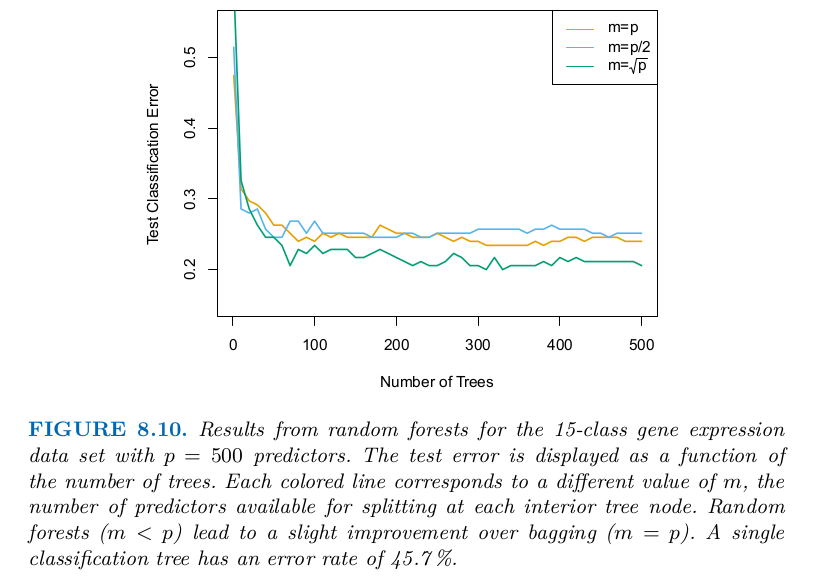

**Boosting**

Every time a tree is build is is only added to the previous collection of trees if it **boosts** its performance. Its a sequential algorithm. Thus:
1. $\hat{f}(x) = 0$ is the average of a set of predictions and $r_i = y_i$ are the residuals (at the beginning residuals are the observations). (this is the initial state)
2. for $b = 1,2 ..., B$ we repeat:
    1. fit a tree with $d$ splits to the observations (if d splits then d+1 terminal nodes).
    2. update $\hat{f}$ by adding in a shrunken version  the new tree:
    $$\Large \hat{f}(x)\ \longleftrightarrow\ {\hat{f}}(x)\,+\,\lambda\,\hat{f}^{b}(x)$$
    4. update the residuals
    $$\Large r_{i}\leftarrow r_{i}-\lambda\hat{f}^{b}(x_{i}).$$
3. output the boosted model
$$\Large \hat{f}(x)=\sum_{b=1}^{B}\lambda\hat{f}^{b}(x).$$

$\lambda$ is the tuning parameter that determine the learning rate and is usually set at 0.01 or 0.001, the depth or number of splits $d$ determines the performance, and the total number of trees. The trees are build from the residuals(point in the box with a cross) which are updated each time, this method gives small trees that improve areas where the model isn't performing well. 

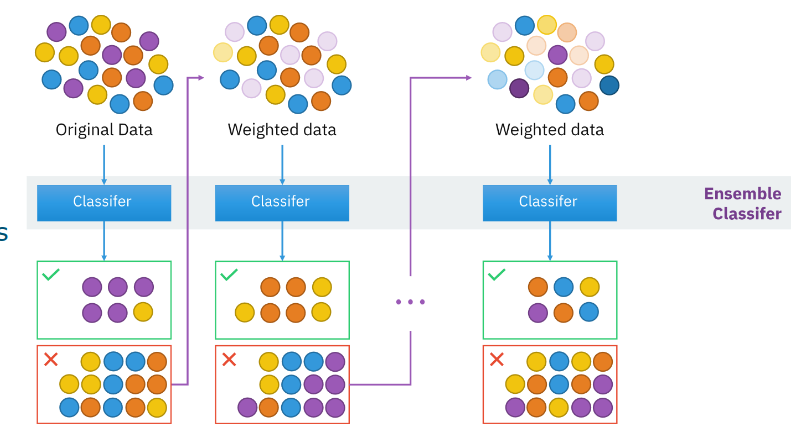

**Variable importance estimation**

Is measured by looking at the sum of the reduction in RSS at every split made by the variable. 

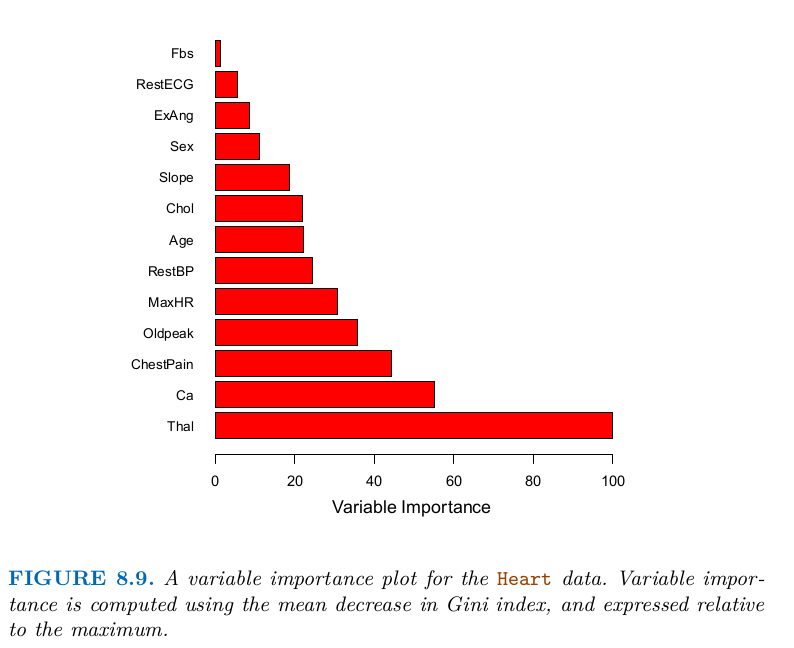

**Similarities between methods**

* Bagging and Random Forest make predictions from an average of regression trees, each built by a bootstrap sample, and in the case of Random Forest also buildt on different set of predictors.
* Boosting is a sequential method that usese the weighted sum of trees.
* BART is combination of RF and boosting: each tree constructed in the RF way, and each tree tries to capture a signal not accounted for by the current model i.e. it uses the residuals in some way.


**Bayesian Additive Regression Trees (BART)**


Let $K$ be the number of trees and $B$ the number of iterations. $\hat{f}_k(x)$ represents the prediction at x for the kth regression tree. At the end we sum up the predictions:
$$\Large \hat{f}^{b}(x)=\sum_{k=1}^{K}\hat{f}_{k}^{b}(x)$$

Each iteration the tree is build by picking a pertubation of the existing tree that improves the fit to the partial residual. The partial residual is calculated by subtracting the from each response value the predictions from all trees but the kth one (hence partial). 

The pertubation can be: different terminal node values, removing branches or adding branches.
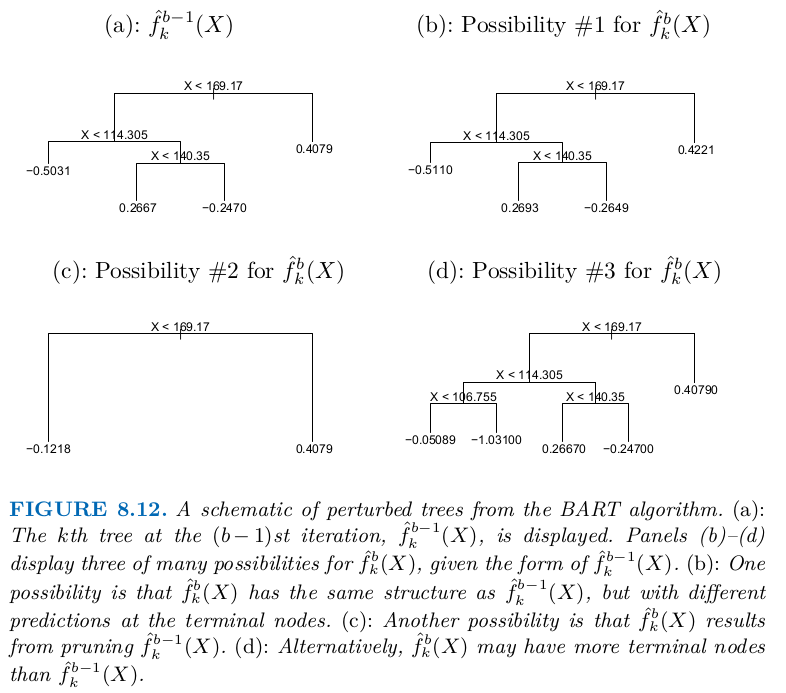

So it works sequentially iterating over values in B but within each cycle it uses random forest to generate trees. 